In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import warnings
warnings.filterwarnings('ignore')

#Models from Scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Feature Encoding
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

#Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV


In [2]:
read_Dataset = pd.read_csv("E:\\College\\Year-Wise\\Third Year\\Semester 5\\Subjects\\Human Physiology\\Project\\healthcare-dataset-stroke-data.csv")

read_Dataset.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
len(read_Dataset)

5110

In [4]:
read_Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
read_Dataset.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [6]:
#Let's find out how many of each class there

read_Dataset["stroke"].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

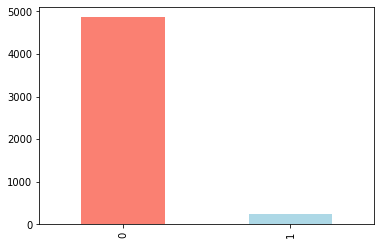

In [7]:
read_Dataset["stroke"].value_counts().plot(kind="bar", color=["salmon", "lightblue"])
plt.show()

In [8]:
# Check whether there are any missing values

read_Dataset.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [9]:
read_Dataset["bmi"].fillna(read_Dataset["bmi"].mean(), inplace = True)

In [10]:
read_Dataset.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [11]:
# Get the data

X = read_Dataset.drop("stroke", axis = 1)
y = read_Dataset["stroke"]

In [12]:
X

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked
...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked


In [42]:
X.iloc[0]

id                              9046
gender                          Male
age                               67
hypertension                       0
heart_disease                      1
ever_married                     Yes
work_type                    Private
Residence_type                 Urban
avg_glucose_level             228.69
bmi                             36.6
smoking_status       formerly smoked
Name: 0, dtype: object

In [13]:
y

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

In [39]:
type(X)

pandas.core.frame.DataFrame

In [69]:
cat_features = ["gender", "ever_married", "work_type", "Residence_type", "smoking_status"]

one_hot = OneHotEncoder()
transformer = ColumnTransformer([
    ("one_hot", 
     one_hot, 
     cat_features)
], remainder="passthrough")

transformed_X = transformer.fit_transform(X.iloc[:])
transformed_X


array([[  0.        ,   1.        ,   0.        , ...,   1.        ,
        228.69      ,  36.6       ],
       [  1.        ,   0.        ,   0.        , ...,   0.        ,
        202.21      ,  28.89323691],
       [  0.        ,   1.        ,   0.        , ...,   1.        ,
        105.92      ,  32.5       ],
       ...,
       [  1.        ,   0.        ,   0.        , ...,   0.        ,
         82.99      ,  30.6       ],
       [  0.        ,   1.        ,   0.        , ...,   0.        ,
        166.29      ,  25.6       ],
       [  1.        ,   0.        ,   0.        , ...,   0.        ,
         85.28      ,  26.2       ]])

In [70]:
transformed_X[0]

array([0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 9.0460e+03, 6.7000e+01, 0.0000e+00, 1.0000e+00,
       2.2869e+02, 3.6600e+01])

In [71]:
len(transformed_X[0])

22

In [15]:
# Split the data into train and test sets

np.random.seed(56)

X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)

In [16]:
len(X_train),len(X_test),len(y_train),len(y_test)

(4088, 1022, 4088, 1022)

In [17]:
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier()
}

#Creating a function to fit and score models

def fit_and_score(models, X_train, X_test, y_train, y_test):
    '''
    Fits and evaluates given machine learning models.
    models: A dict of different Scikit-learn Machine learning models
    X_train: Training data (no labels)
    X_test: Testing data (no labels)
    y_train: Training Labels
    y_test: Testing Labels
    '''
    
    #Set a random seed
    np.random.seed(56)
    
    #Make a dictionary to keep the model scores
    model_scores = {}
    
    #Loop through the models
    for name, model in models.items():
        #Fit the model to the data
        model.fit(X_train, y_train)
        
        #Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    
    return model_scores

In [18]:
model_scores = fit_and_score(models = models,
             X_train = X_train,
             X_test = X_test,
             y_train = y_train,
             y_test = y_test)

model_scores

{'Logistic Regression': 0.9530332681017613,
 'KNN': 0.952054794520548,
 'Random Forest': 0.9530332681017613}

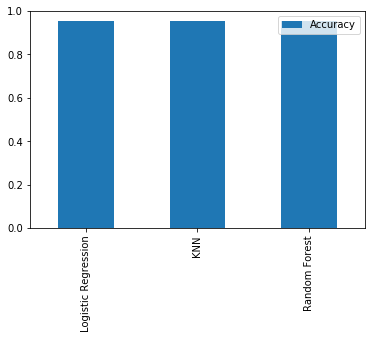

In [19]:
model_compare = pd.DataFrame(model_scores, index=["Accuracy"])
model_compare.T.plot(kind="bar")

plt.show()

In [20]:
rf_grid = {
    "n_estimators": np.arange(10, 1000, 50),
    "max_depth": [None, 3, 5, 10],
    "min_samples_split": np.arange(2, 20, 2),
    "min_samples_leaf": np.arange(1, 20, 2)
}

## Hyperparameter tuning using RanomizedSearchCV

In [21]:
np.random.seed(56)

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                               param_distributions=rf_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)

rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 11.2min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [22]:
rs_rf.score(X_test, y_test)

0.9530332681017613

In [23]:
rs_rf.best_params_

{'n_estimators': 610,
 'min_samples_split': 2,
 'min_samples_leaf': 9,
 'max_depth': 3}

In [24]:
# Here for this dataset we are going to use Logistic Regressor with the best parameters

model = RandomForestClassifier(n_estimators = 610,
 min_samples_split = 2,
 min_samples_leaf = 9,
 max_depth = 3)

model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=610,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [25]:
model.score(X_test, y_test)

0.9530332681017613

In [26]:
cv_acc = cross_val_score(model, transformed_X, y, cv=5, scoring="accuracy")

cv_acc

array([0.95107632, 0.95107632, 0.95107632, 0.95107632, 0.95205479])

In [27]:
np.mean(cv_acc)

0.9512720156555773

In [28]:
model_name="stroke_Predictor.joblib"
joblib.dump(model, model_name)

['stroke_Predictor.joblib']

In [29]:
imported_Stroke_Predictor = joblib.load("stroke_Predictor.joblib")

In [30]:
imported_Stroke_Predictor.score(transformed_X, y)

0.9512720156555773